In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import jenkspy

In [4]:
df = pd.read_excel(r"C:\Users\Aditya P J\Documents\Magang dan KKN\Magang\Proyek\data_cleanedbronze1_PGN.xlsx")
X = df[['Terukur m3']].values
df.head()

,SBU,Kode Area,No Ref,Account Name,Sektor Industri,Periode,Terukur m3,Terukur mmbtu,Batas Min,Batas Max,segmentasi
0,SOR I,17,28320,"REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...",MAKANAN (FOOD),2022-01-01,2240.6498,79.8386,1001,10000,Bronze 1
1,SOR I,17,28320,"REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...",MAKANAN (FOOD),2022-02-01,1927.2066,68.6761,1001,10000,Bronze 1
2,SOR I,17,28320,"REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...",MAKANAN (FOOD),2022-03-01,2148.8322,76.7308,1001,10000,Bronze 1
3,SOR I,17,28320,"REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...",MAKANAN (FOOD),2022-04-01,2099.8126,75.0199,1001,10000,Bronze 1
4,SOR I,17,28320,"REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...",MAKANAN (FOOD),2022-05-01,2482.0835,88.3512,1001,10000,Bronze 1


In [5]:
df_mean = df.groupby('Account Name')['Terukur m3'].mean().reset_index()
df_mean.rename(columns={'Terukur m3': 'mean_terukur_m3'}, inplace=True)

n_classes = 2 
breaks = jenkspy.jenks_breaks(df_mean['mean_terukur_m3'].values, n_classes)
print(f'Jenks Breaks: {breaks}')

# Fungsi untuk assign cluster Jenks
def assign_jenks_cluster(x, breaks):
    for i in range(len(breaks) - 1):
        if breaks[i] <= x < breaks[i + 1]:
            return i
    if x == breaks[-1]:
        return len(breaks) - 2
    return np.nan

df_mean['jenks_cluster'] = df_mean['mean_terukur_m3'].apply(lambda x: assign_jenks_cluster(x, breaks))


Jenks Breaks: [505.4621, 4739.857177777778, 15208.949]


In [6]:
summary = df_mean.groupby('jenks_cluster')['mean_terukur_m3'].agg(['count', 'mean', 'min', 'max']).reset_index()
summary['percentage'] = summary['count'] / len(df_mean) * 100
print(summary)


   jenks_cluster  count         mean          min          max  percentage
0              0    755  2120.613359   505.462100   4731.05606   80.063627
1              1    188  7357.829907  4739.857178  15208.94900   19.936373


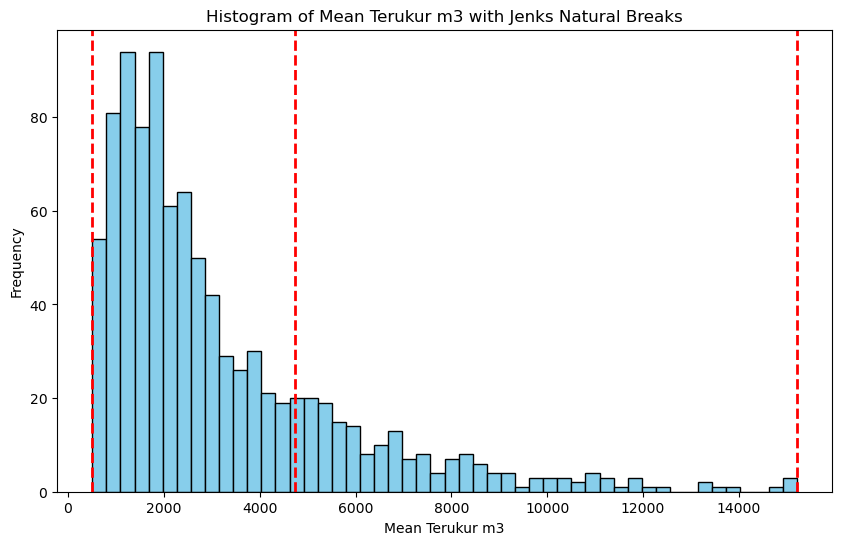

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_mean['mean_terukur_m3'], bins=50, color='skyblue', edgecolor='black')
for b in breaks:
    plt.axvline(b, color='red', linestyle='--', linewidth=2)
plt.title('Histogram of Mean Terukur m3 with Jenks Natural Breaks')
plt.xlabel('Mean Terukur m3')
plt.ylabel('Frequency')
plt.show()


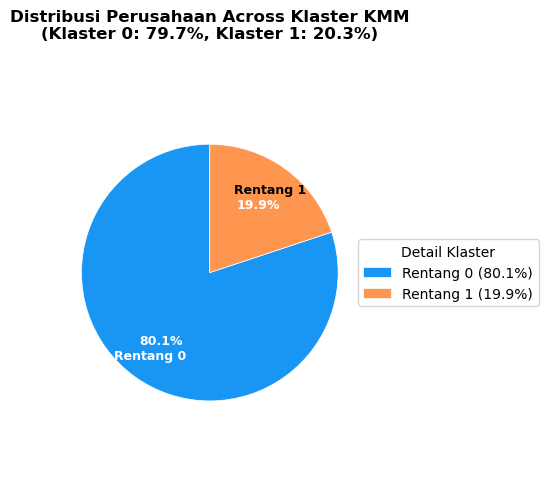

In [20]:
# Prepare data
counts = pd.Series({0: 80.1, 1: 19.9}) 
labels = [f'Rentang {i}' for i in counts.index]
colors = plt.cm.rainbow([0.2, 0.8])  # Menggunakan nilai yang berbeda untuk warna berbeda

# Create figure with constrained layout
plt.figure(figsize=(5, 5), dpi=100, facecolor='white')
plt.rcParams['font.size'] = 10

# Create pie chart with improved parameters
wedges, texts, autotexts = plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',  # Menampilkan semua persentase
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
    pctdistance=0.65,
    labeldistance=0.8,
    textprops={
        'color': 'white',
        'weight': 'bold',
        'fontsize': 9
    }
)

# Improve label positioning and styling
for text, wedge in zip(texts, wedges):
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')
    r, g, b, _ = wedge.get_facecolor()
    text.set_color('black' if (r*0.299 + g*0.587 + b*0.114) > 0.6 else 'white')

# Add title with padding
plt.title(
    'Distribusi Perusahaan Across Klaster KMM\n(Klaster 0: 79.7%, Klaster 1: 20.3%)',
    pad=20,
    fontweight='bold',
    fontsize=12
)

# Add legend
plt.legend(
    wedges,
    [f'{l} ({c}%)' for l, c in zip(labels, counts)],
    title="Detail Klaster",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.axis('equal')
plt.tight_layout()
plt.show()

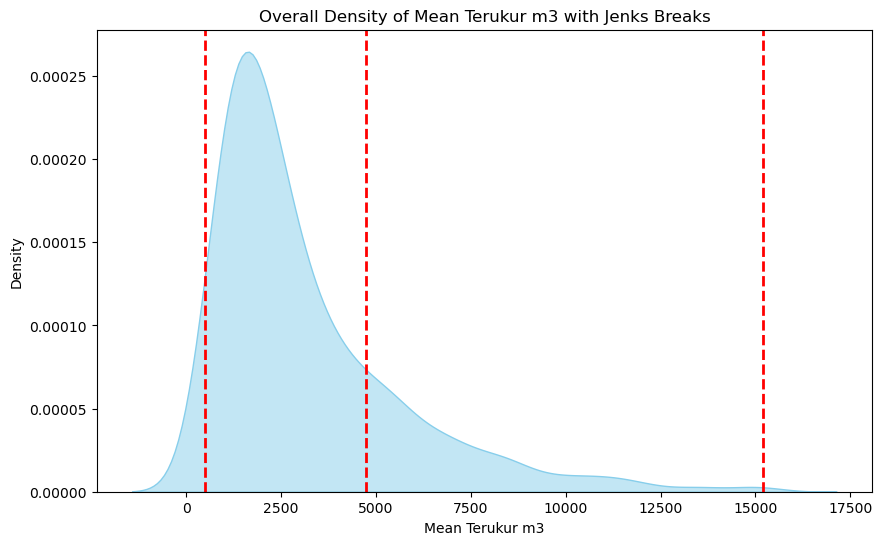

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot density secara keseluruhan
plt.figure(figsize=(10, 6))
sns.kdeplot(df_mean['mean_terukur_m3'], fill=True, color='skyblue', alpha=0.5)
for b in breaks:
    plt.axvline(b, color='red', linestyle='--', linewidth=2)
plt.title('Overall Density of Mean Terukur m3 with Jenks Breaks')
plt.xlabel('Mean Terukur m3')
plt.ylabel('Density')
plt.show()


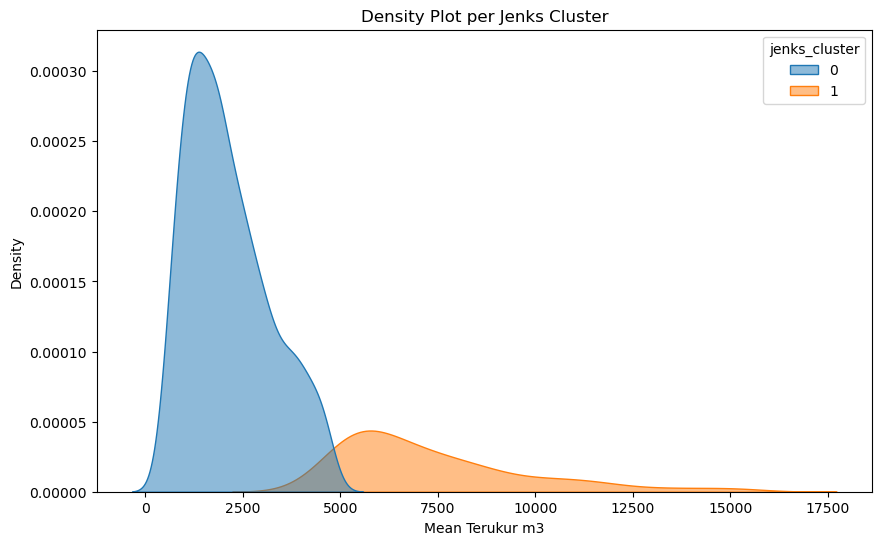

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_mean, x='mean_terukur_m3', hue='jenks_cluster', fill=True, alpha=0.5, palette='tab10')
plt.title('Density Plot per Jenks Cluster')
plt.xlabel('Mean Terukur m3')
plt.ylabel('Density')
plt.show()


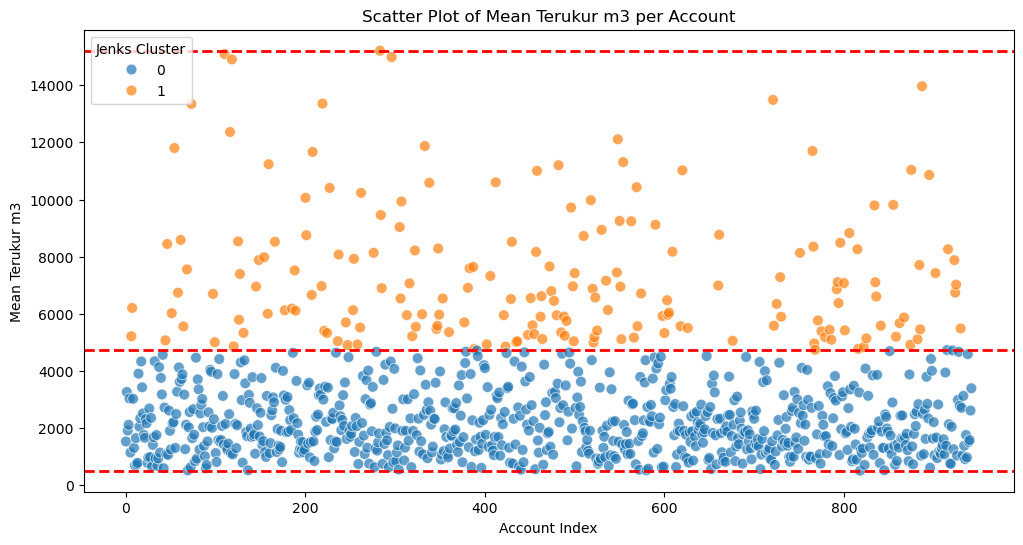

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(df_mean)), 
                y='mean_terukur_m3', 
                hue='jenks_cluster', 
                data=df_mean, 
                palette='tab10', 
                s=60, 
                alpha=0.7)

# Garis Jenks
for b in breaks:
    plt.axhline(b, color='red', linestyle='--', linewidth=2)

plt.title('Scatter Plot of Mean Terukur m3 per Account')
plt.xlabel('Account Index')
plt.ylabel('Mean Terukur m3')
plt.legend(title='Jenks Cluster')
plt.show()


In [16]:
cluster_stats = df_mean.groupby('jenks_cluster')['mean_terukur_m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+-----------------+---------+---------+---------+---------+---------+---------+---------+----------+
|   jenks_cluster |   count |    mean |     std |     min |     25% |     50% |     75% |      max |
+=================+=========+=========+=========+=========+=========+=========+=========+==========+
|               0 |  755.00 | 2120.61 | 1064.12 |  505.46 | 1266.84 | 1898.90 | 2804.62 |  4731.06 |
+-----------------+---------+---------+---------+---------+---------+---------+---------+----------+
|               1 |  188.00 | 7357.83 | 2391.97 | 4739.86 | 5513.50 | 6677.82 | 8454.92 | 15208.95 |
+-----------------+---------+---------+---------+---------+---------+---------+---------+----------+


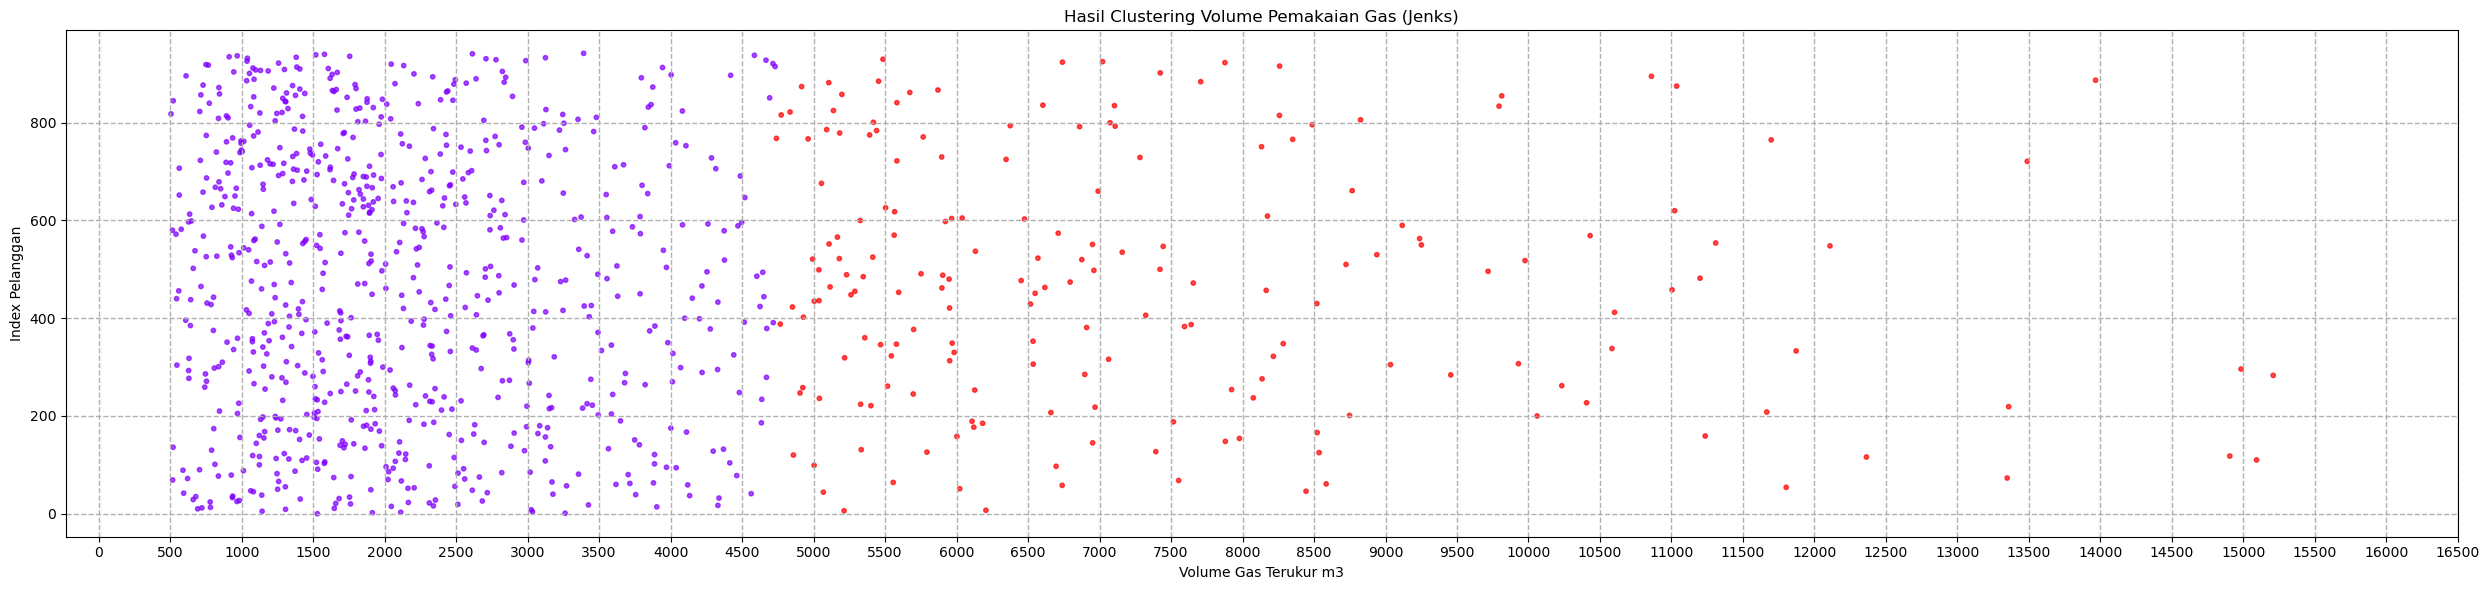

In [86]:
plt.figure(figsize=(25, 6))
plt.scatter(df_mean['mean_terukur_m3'], 
            df_mean.index, 
            c=df_mean['jenks_cluster'],  # pakai cluster, bukan nilai m3
            cmap='rainbow', 
            s=10, 
            alpha=0.7)

plt.title('Hasil Clustering Volume Pemakaian Gas (Jenks)')
plt.xlabel('Volume Gas Terukur m3')
plt.ylabel('Index Pelanggan')

max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()
